In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statistics as stats

# Total morphine equivalence vs. Patients' pain level

Main drugs: 1.Morphine 2.Dilaudid 3.Fentanyl 4.Other(specify)

Other drugs:

Supplemental opioids: 0.no 1.oral morphine or hydrocodone 2.oral diaudid 3.IV fentanyl 4.oxycodone 5.IV dilaudid 6.IV morphine 7.other

NSAID(oral/IV): 1.ketorolac 2.ibuprofen

Acetaminophen(no/oral/IV)

Epidural/OnQ Drug:1.Ropivicaine 0.1% 2.Ropivicaine 0.2% 3.Bupivicaine 0.1% 4.Bupivicaine 0.125%

Other meds: 0.no 1.methocarnamol 2.diazepam 3.neurontin 4.klonopin 5.clonidine

All five categories of other drugs were combined into one "morphine equivalence", so we can take a look at the total morphine equivalence from main drug and other drugs and how it related to the pain level.

# Spine surgery

In [174]:
# Merge spine surgery patients data with calculation sheet
spine_drug = spine_df.merge(df_morphine, left_on = 'PatientID', right_on = 'PatientID', how = 'left')
spine_drug

,"GroupingInclusions (1 include, 2 exclude)","Genetics (1 yes, 2=NO)",PatientGender,PatientAge,PatientWeight,PatientRace,"WhatSurgery (1=Nuss, 2= Spine, 3=other)",Haller Index (999= not applicable),Risser,"Top level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)",...,181-195 hrs supplemental opioid dose .1,181-195 hrs # of supplemental opioid doses.1,169-180 hrs mg/hr morphine equivalents (total/9 oral or total/1.8 IV) of dilaudid,181-195 hrs supplemental opioid dose .2,181-195 hrs # of supplemental opioid doses.2,181-95 hrs mg/hr morphine equivalents (total/24) of oxycodone,"181-195 hrs other meds 0-no, 1- methocarbamol, 2- diazepam, 3- neurontin, 4-klonopin, 5-clonidine",181-195 hrs other med dose,181-195 hrs # of other med doses,181-195 hrs Total mg/hr morphine equivalents
PatientID,,,,,,,,,,,,,,,,,,,,,
504,1,1,2,137,63.0,1,2,999.0,777.0,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,1,1,1,234,57.7,1,2,999.0,5.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,1,1,2,158,40.0,1,2,999.0,777.0,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,1,1,2,177,58.0,1,2,999.0,4.0,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
511,1,1,2,165,63.0,1,2,999.0,2.0,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
512,1,1,1,238,76.2,1,2,999.0,777.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,1,1,2,156,83.0,1,2,999.0,777.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
516,1,1,2,155,50.9,3,2,999.0,4.0,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517,2,1,2,181,45.8,4,2,999.0,3.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
#use only 0-120 hr
pain_level =  spine_drug[["Hrs0_12MeanPainScoreVASstd","Hrs13_24MeanPainScoreVASstd","Hrs25_36MeanPainScoreVASstd",\
                        "Hrs37_48MeanPainScoreVASstd","Hrs49_60MeanPainScoreVASstd","Hrs61_72MeanPainScoreVASstd",\
                        "Hrs73_84MeanPainScoreVASstd","Hrs85_96MeanPainScoreVASstd","Hrs97_108MeanPainScoreVASstd",\
                         "Hrs109_120MeanPainScoreVASstd"]]
other_drug = spine_drug[["0-12 hrs Total mg/hr morphine equivalents",\
                        "13-24 hrs Total mg/hr morphine equivalents","25-36 hrs Total mg/hr morphine equivalents",\
                        "37-48 hrs Total mg/hr morphine equivalents","49-60 hrs Total mg/hr morphine equivalents",\
                        "61-72 hrs Total mg/hr morphine equivalents","73-84 hrs Total mg/hr morphine equivalents",\
                        "85-96 hrs Total mg/hr morphine equivalents","97-108 hrs  Total mg/hr morphine equivalents",\
                        "109-120 hrs Total mg/hr morphine equivalents"]]
main_drug = spine_drug[["0-12 hrs mg/hr morphine equivalents","13-24 hrs mg/hr morphine equivalents",\
                      "25-36 hrs mg/hr morphine equivalents","37-48 hrs mg/hr morphine equivalents",\
                      "49-60 hrs mg/hr morphine equivalents","61-72 hrs mg/hr morphine equivalents",\
                      "73-84 hrs mg/hr morphine equivalents","85-96 hrs mg/hr morphine equivalents",\
                      "97-108 hrs mg/hr morphine equivalents","109-120 hrs mg/hr morphine equivalents"]]

In [162]:
pain_level.head(10)

,Hrs0_12MeanPainScoreVASstd,Hrs13_24MeanPainScoreVASstd,Hrs25_36MeanPainScoreVASstd,Hrs37_48MeanPainScoreVASstd,Hrs49_60MeanPainScoreVASstd,Hrs61_72MeanPainScoreVASstd,Hrs73_84MeanPainScoreVASstd,Hrs85_96MeanPainScoreVASstd,Hrs97_108MeanPainScoreVASstd,Hrs109_120MeanPainScoreVASstd
PatientID,,,,,,,,,,
501,7.919208,8.079208,7.459208,7.449208,7.749208,6.579208,5.959208,7.499208,7.749208,6.079208
502,3.530917,3.860917,3.200917,3.030917,3.530917,3.200917,1.030917,2.530917,NaN,NaN
503,5.406583,0.906583,3.656583,5.156583,4.236583,3.236583,5.326583,4.236583,NaN,NaN
505,2.325375,5.115375,3.575375,4.025375,3.155375,3.115375,6.825375,4.575375,5.075375,3.575375
507,1.071976,-1.178024,0.321976,-0.178024,3.821976,4.821976,2.821976,2.321976,3.821976,1.221976
518,3.837467,4.137467,1.037467,2.967467,4.637467,4.137467,3.637467,2.967467,2.887467,NaN
521,3.369000,3.769000,3.079000,2.369000,2.869000,3.569000,4.119000,3.749000,3.569000,3.039000
522,5.478667,4.228667,2.478667,4.978667,3.478667,3.978667,2.478667,3.808667,4.228667,3.478667
524,8.283250,7.113250,6.613250,7.613250,7.613250,6.613250,6.613250,6.113250,NaN,NaN


In [163]:
other_drug.head(10)

,0-12 hrs Total mg/hr morphine equivalents,13-24 hrs Total mg/hr morphine equivalents,25-36 hrs Total mg/hr morphine equivalents,37-48 hrs Total mg/hr morphine equivalents,49-60 hrs Total mg/hr morphine equivalents,61-72 hrs Total mg/hr morphine equivalents,73-84 hrs Total mg/hr morphine equivalents,85-96 hrs Total mg/hr morphine equivalents,97-108 hrs Total mg/hr morphine equivalents,109-120 hrs Total mg/hr morphine equivalents
PatientID,,,,,,,,,,
501,4.000000,4.220000,3.660000,4.040000,4.060000,3.223833,5.335000,4.640000,2.028583,1.973000
502,3.534600,4.334500,4.779167,4.890333,4.334500,4.195333,2.847333,2.416667,0.000000,0.000000
503,3.580000,3.250000,5.330000,3.710000,4.790000,4.833333,1.666667,1.666667,0.000000,0.000000
505,2.889333,5.668500,4.473458,5.001500,5.629592,4.779667,4.168500,3.389500,1.458333,1.250000
507,4.967750,4.812583,4.534667,5.535167,4.145583,3.156250,3.783667,1.666667,5.300000,2.000000
518,2.878583,2.433917,2.267167,2.433917,2.433917,2.156000,2.600667,2.405917,2.100000,1.258333
521,1.834250,4.023333,3.411917,4.323483,3.356333,4.550333,3.883333,2.083333,1.250000,1.666667
522,3.056083,3.834250,3.445167,4.445667,3.523483,4.112167,3.111667,2.194833,0.416667,0.416667
524,1.389583,4.556833,4.001000,4.112167,3.889833,4.736750,2.875000,1.666667,NaN,0.000000


In [164]:
main_drug.head(10)

,0-12 hrs mg/hr morphine equivalents,13-24 hrs mg/hr morphine equivalents,25-36 hrs mg/hr morphine equivalents,37-48 hrs mg/hr morphine equivalents,49-60 hrs mg/hr morphine equivalents,61-72 hrs mg/hr morphine equivalents,73-84 hrs mg/hr morphine equivalents,85-96 hrs mg/hr morphine equivalents,97-108 hrs mg/hr morphine equivalents,109-120 hrs mg/hr morphine equivalents
PatientID,,,,,,,,,,
501,2.000000,2.220000,1.660000,2.040000,2.060000,3.223833,3.335000,2.223333,1.611917,1.556333
502,2.534600,2.334500,2.779167,2.890333,2.334500,1.778667,0.222333,NaN,NaN,NaN
503,1.580000,1.250000,3.330000,1.710000,1.540000,0.750000,NaN,NaN,NaN,NaN
505,0.889333,3.668500,2.473458,3.001500,3.629592,3.779667,3.668500,1.222833,NaN,NaN
507,2.167750,2.945917,2.668000,3.668500,2.278917,1.389583,0.667000,NaN,NaN,NaN
518,1.611917,1.167250,1.000500,1.167250,1.167250,0.889333,1.334000,0.722583,NaN,NaN
521,1.834250,2.223333,1.611917,2.523483,1.556333,0.667000,NaN,NaN,NaN,NaN
522,1.056083,1.834250,1.445167,2.445667,2.523483,2.112167,1.111667,0.778167,NaN,NaN
524,1.389583,2.556833,2.001000,2.112167,1.889833,1.278417,NaN,NaN,NaN,NaN


C:\Users\qtang\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


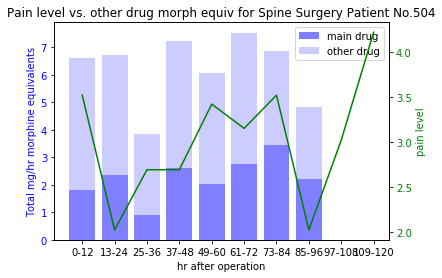

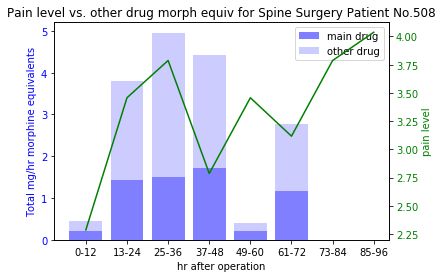

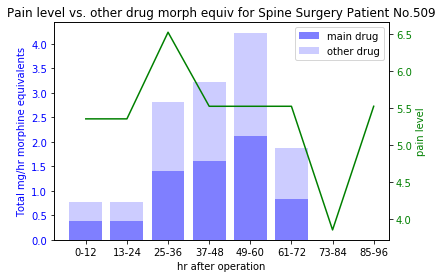

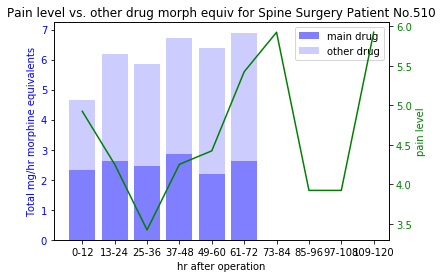

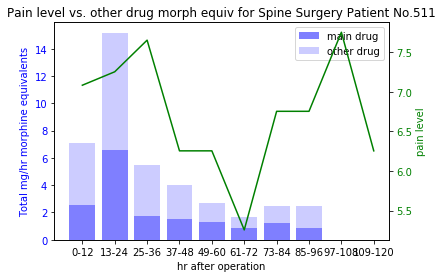

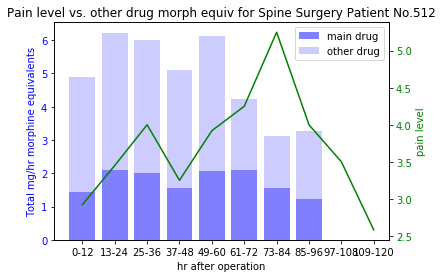

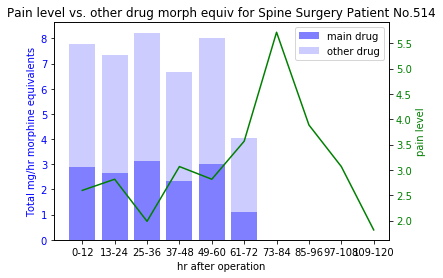

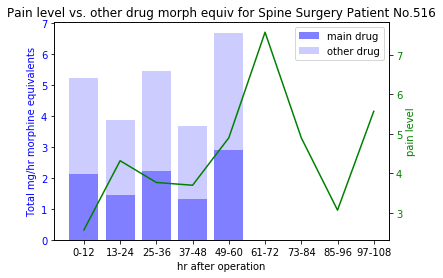

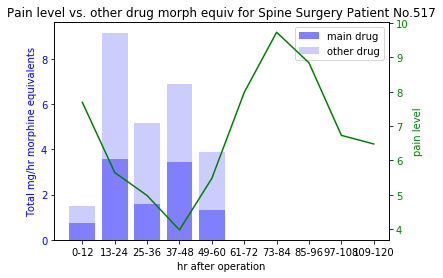

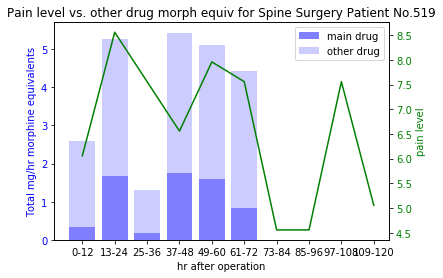

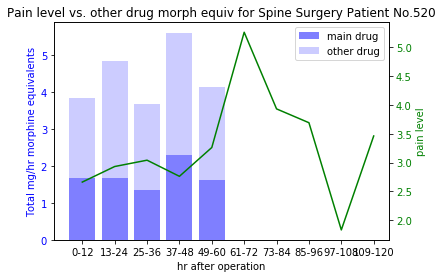

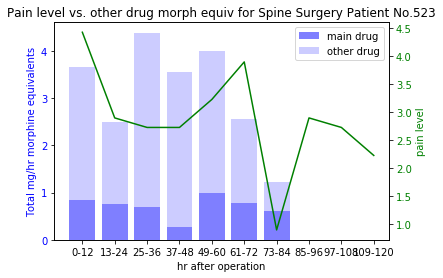

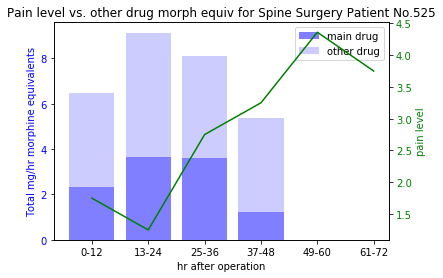

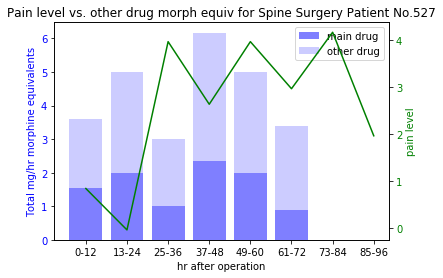

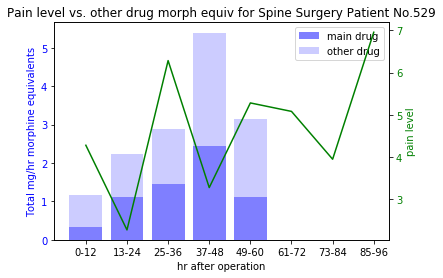

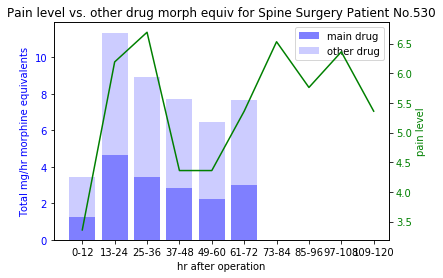

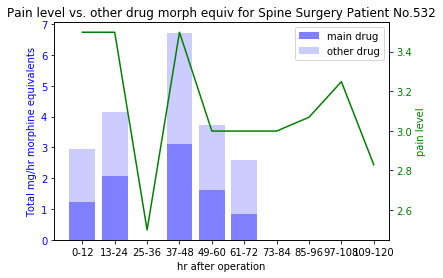

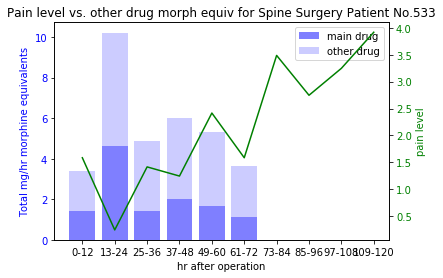

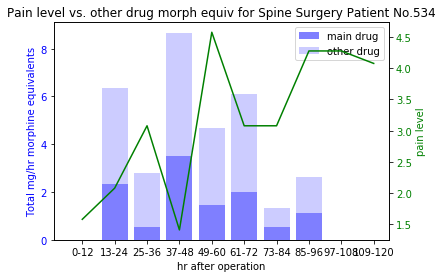

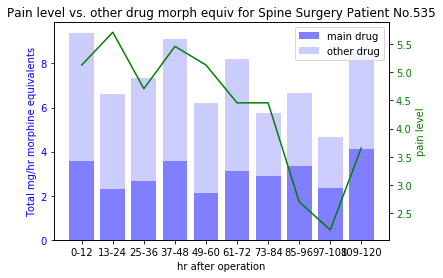

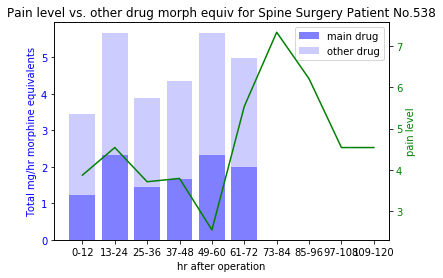

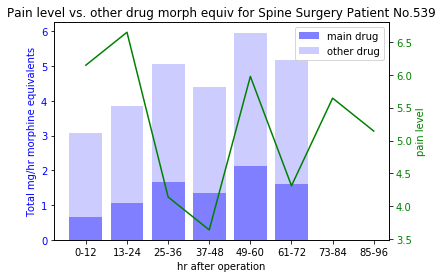

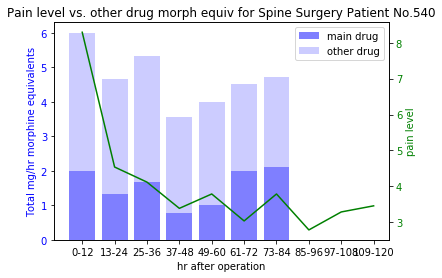

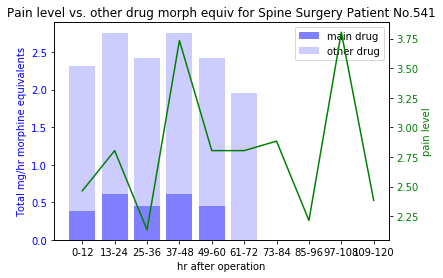

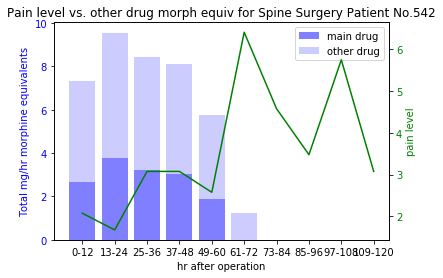

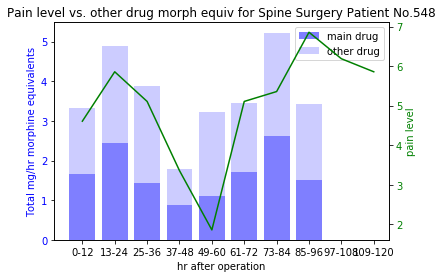

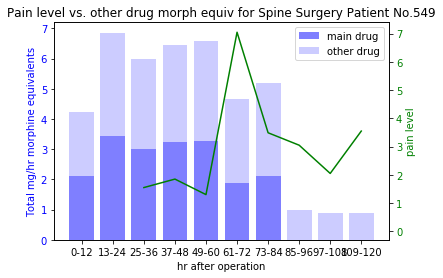

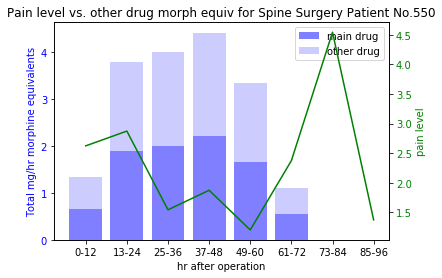

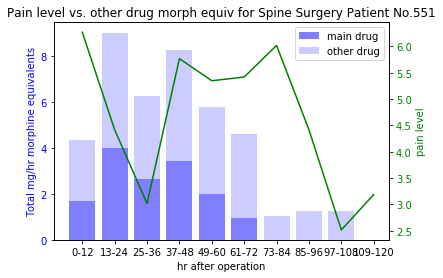

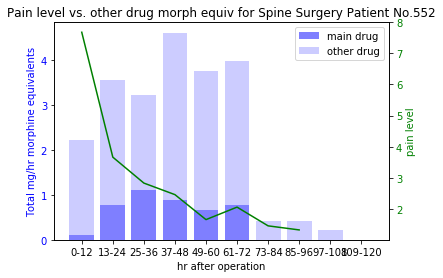

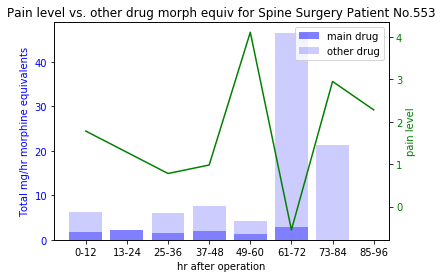

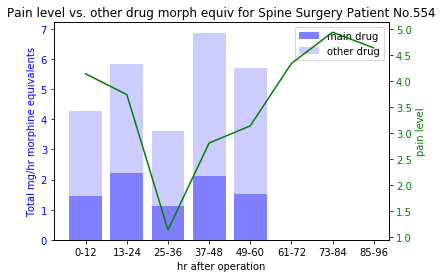

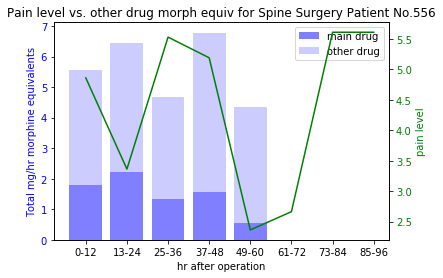

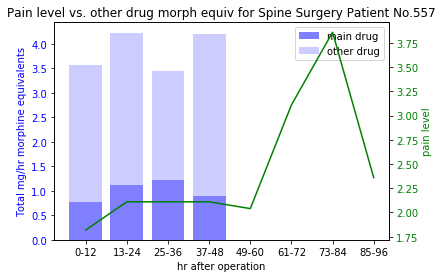

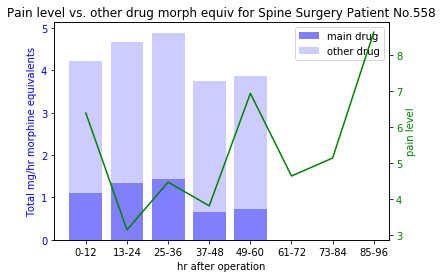

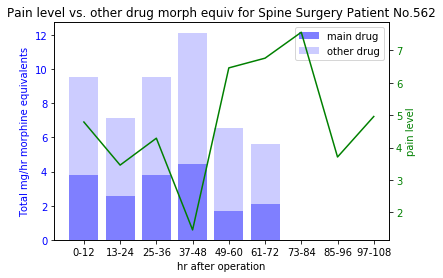

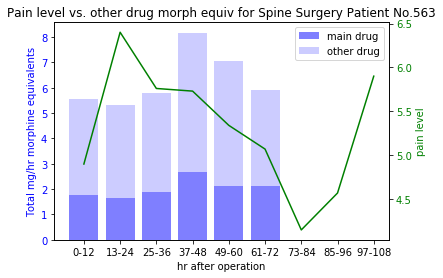

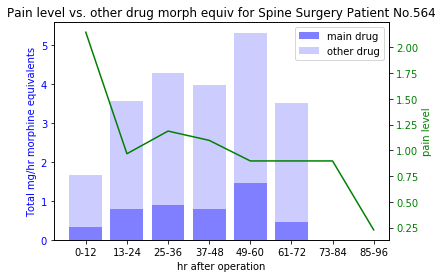

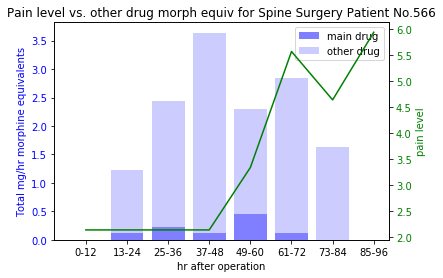

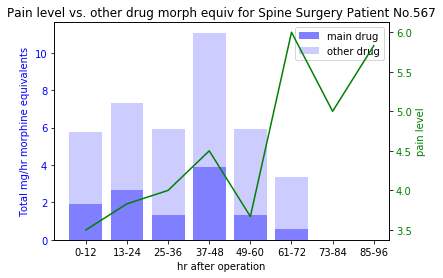

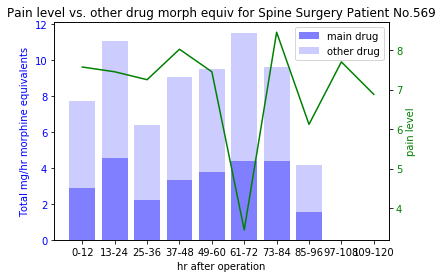

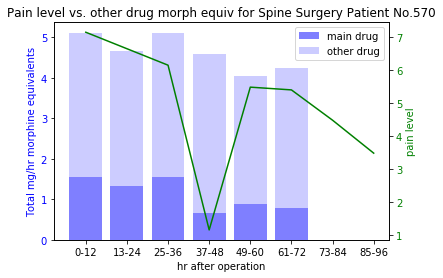

In [168]:
#plot for each individual patient who received spine surgery

for i in range(0,42):
    df = pd.DataFrame({
    "hr_after_operation": ["0-12","13-24","25-36","37-48","49-60","61-72","73-84","85-96","97-108","109-120"],
    "mean pain score": list(pain_level.iloc[i,:]),
    "main drug morph equiv":list(main_drug.iloc[i,:]),
    "other drug morph equiv": list(other_drug.iloc[i,:])})
    fig, ax1 = plt.subplots()
    ax1.bar(df["hr_after_operation"], df["main drug morph equiv"], align='center', alpha=0.5,color='b',label="main drug")
    ax1.bar(df["hr_after_operation"], df["other drug morph equiv"], bottom=df["main drug morph equiv"],\
            align='center',alpha=0.2,color='b',label="other drug")
    ax1.legend(loc="upper right")
    ax1.set_xlabel("hr after operation")
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel("Total mg/hr morphine equivalents", color='b')
    [tl.set_color('b') for tl in ax1.get_yticklabels()]
    plt.title('Pain level vs. other drug morph equiv for Spine Surgery Patient No.'+ str(other_drug.index[i]))
    #Set up ax2 to be the second y axis with x shared
    ax2 = ax1.twinx()
    #Plot a line
    ax2.plot(df["hr_after_operation"], df["mean pain score"], 'g-')
    # Make the y-axis label and tick labels match the line color.
    ax2.set_ylabel('pain level', color='g')
    [tl.set_color('g') for tl in ax2.get_yticklabels()]


# Chest surgery

In [175]:
# Merge chest surgery patients data with calculation sheet
chest_drug = chest_df.merge(df_morphine, left_on = 'PatientID', right_on = 'PatientID', how = 'left')
chest_drug

,"GroupingInclusions (1 include, 2 exclude)","Genetics (1 yes, 2=NO)",PatientGender,PatientAge,PatientWeight,PatientRace,"WhatSurgery (1=Nuss, 2= Spine, 3=other)",Haller Index (999= not applicable),Risser,"Top level (0-7 Cervical, 8-19 thoracic, 20-24-lumbar, 999 not applicable)",...,181-195 hrs supplemental opioid dose .1,181-195 hrs # of supplemental opioid doses.1,169-180 hrs mg/hr morphine equivalents (total/9 oral or total/1.8 IV) of dilaudid,181-195 hrs supplemental opioid dose .2,181-195 hrs # of supplemental opioid doses.2,181-95 hrs mg/hr morphine equivalents (total/24) of oxycodone,"181-195 hrs other meds 0-no, 1- methocarbamol, 2- diazepam, 3- neurontin, 4-klonopin, 5-clonidine",181-195 hrs other med dose,181-195 hrs # of other med doses,181-195 hrs Total mg/hr morphine equivalents
PatientID,,,,,,,,,,,,,,,,,,,,,
501,1,1,1,194,65.0,1,1,3.90,999.0,999,...,NaN,NaN,0.0,5.0,5.0,1.041667,1 oral,500.0,1.0,1.041667
502,1,1,1,179,57.0,1,1,3.86,999.0,999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,1,1,1,185,68.0,1,1,3.90,999.0,999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,1,1,1,180,66.0,1,1,3.10,999.0,999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,1,1,1,167,55.0,1,1,5.90,999.0,999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,1,1,1,170,38.0,1,1,3.20,999.0,999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
521,1,1,1,178,53.0,1,1,5.50,999.0,999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
522,1,1,1,225,71.5,1,1,3.98,999.0,999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
524,1,1,1,237,61.7,1,1,5.30,999.0,999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
#only use 0-120 hr
pain_level =  chest_drug[["Hrs0_12MeanPainScoreVASstd","Hrs13_24MeanPainScoreVASstd","Hrs25_36MeanPainScoreVASstd",\
                        "Hrs37_48MeanPainScoreVASstd","Hrs49_60MeanPainScoreVASstd","Hrs61_72MeanPainScoreVASstd",\
                        "Hrs73_84MeanPainScoreVASstd","Hrs85_96MeanPainScoreVASstd","Hrs97_108MeanPainScoreVASstd",\
                         "Hrs109_120MeanPainScoreVASstd"]]
other_drug = chest_drug[["0-12 hrs Total mg/hr morphine equivalents",\
                        "13-24 hrs Total mg/hr morphine equivalents","25-36 hrs Total mg/hr morphine equivalents",\
                        "37-48 hrs Total mg/hr morphine equivalents","49-60 hrs Total mg/hr morphine equivalents",\
                        "61-72 hrs Total mg/hr morphine equivalents","73-84 hrs Total mg/hr morphine equivalents",\
                        "85-96 hrs Total mg/hr morphine equivalents","97-108 hrs  Total mg/hr morphine equivalents",\
                        "109-120 hrs Total mg/hr morphine equivalents"]]
main_drug = chest_drug[["0-12 hrs mg/hr morphine equivalents","13-24 hrs mg/hr morphine equivalents",\
                      "25-36 hrs mg/hr morphine equivalents","37-48 hrs mg/hr morphine equivalents",\
                      "49-60 hrs mg/hr morphine equivalents","61-72 hrs mg/hr morphine equivalents",\
                      "73-84 hrs mg/hr morphine equivalents","85-96 hrs mg/hr morphine equivalents",\
                      "97-108 hrs mg/hr morphine equivalents","109-120 hrs mg/hr morphine equivalents"]]

In [179]:
pain_level.head(10)

,Hrs0_12MeanPainScoreVASstd,Hrs13_24MeanPainScoreVASstd,Hrs25_36MeanPainScoreVASstd,Hrs37_48MeanPainScoreVASstd,Hrs49_60MeanPainScoreVASstd,Hrs61_72MeanPainScoreVASstd,Hrs73_84MeanPainScoreVASstd,Hrs85_96MeanPainScoreVASstd,Hrs97_108MeanPainScoreVASstd,Hrs109_120MeanPainScoreVASstd
PatientID,,,,,,,,,,
501,7.919208,8.079208,7.459208,7.449208,7.749208,6.579208,5.959208,7.499208,7.749208,6.079208
502,3.530917,3.860917,3.200917,3.030917,3.530917,3.200917,1.030917,2.530917,NaN,NaN
503,5.406583,0.906583,3.656583,5.156583,4.236583,3.236583,5.326583,4.236583,NaN,NaN
505,2.325375,5.115375,3.575375,4.025375,3.155375,3.115375,6.825375,4.575375,5.075375,3.575375
507,1.071976,-1.178024,0.321976,-0.178024,3.821976,4.821976,2.821976,2.321976,3.821976,1.221976
518,3.837467,4.137467,1.037467,2.967467,4.637467,4.137467,3.637467,2.967467,2.887467,NaN
521,3.369000,3.769000,3.079000,2.369000,2.869000,3.569000,4.119000,3.749000,3.569000,3.039000
522,5.478667,4.228667,2.478667,4.978667,3.478667,3.978667,2.478667,3.808667,4.228667,3.478667
524,8.283250,7.113250,6.613250,7.613250,7.613250,6.613250,6.613250,6.113250,NaN,NaN


In [180]:
other_drug.head(10)

,0-12 hrs Total mg/hr morphine equivalents,13-24 hrs Total mg/hr morphine equivalents,25-36 hrs Total mg/hr morphine equivalents,37-48 hrs Total mg/hr morphine equivalents,49-60 hrs Total mg/hr morphine equivalents,61-72 hrs Total mg/hr morphine equivalents,73-84 hrs Total mg/hr morphine equivalents,85-96 hrs Total mg/hr morphine equivalents,97-108 hrs Total mg/hr morphine equivalents,109-120 hrs Total mg/hr morphine equivalents
PatientID,,,,,,,,,,
501,4.000000,4.220000,3.660000,4.040000,4.060000,3.223833,5.335000,4.640000,2.028583,1.973000
502,3.534600,4.334500,4.779167,4.890333,4.334500,4.195333,2.847333,2.416667,0.000000,0.000000
503,3.580000,3.250000,5.330000,3.710000,4.790000,4.833333,1.666667,1.666667,0.000000,0.000000
505,2.889333,5.668500,4.473458,5.001500,5.629592,4.779667,4.168500,3.389500,1.458333,1.250000
507,4.967750,4.812583,4.534667,5.535167,4.145583,3.156250,3.783667,1.666667,5.300000,2.000000
518,2.878583,2.433917,2.267167,2.433917,2.433917,2.156000,2.600667,2.405917,2.100000,1.258333
521,1.834250,4.023333,3.411917,4.323483,3.356333,4.550333,3.883333,2.083333,1.250000,1.666667
522,3.056083,3.834250,3.445167,4.445667,3.523483,4.112167,3.111667,2.194833,0.416667,0.416667
524,1.389583,4.556833,4.001000,4.112167,3.889833,4.736750,2.875000,1.666667,NaN,0.000000


In [181]:
main_drug.head(10)

,0-12 hrs mg/hr morphine equivalents,13-24 hrs mg/hr morphine equivalents,25-36 hrs mg/hr morphine equivalents,37-48 hrs mg/hr morphine equivalents,49-60 hrs mg/hr morphine equivalents,61-72 hrs mg/hr morphine equivalents,73-84 hrs mg/hr morphine equivalents,85-96 hrs mg/hr morphine equivalents,97-108 hrs mg/hr morphine equivalents,109-120 hrs mg/hr morphine equivalents
PatientID,,,,,,,,,,
501,2.000000,2.220000,1.660000,2.040000,2.060000,3.223833,3.335000,2.223333,1.611917,1.556333
502,2.534600,2.334500,2.779167,2.890333,2.334500,1.778667,0.222333,NaN,NaN,NaN
503,1.580000,1.250000,3.330000,1.710000,1.540000,0.750000,NaN,NaN,NaN,NaN
505,0.889333,3.668500,2.473458,3.001500,3.629592,3.779667,3.668500,1.222833,NaN,NaN
507,2.167750,2.945917,2.668000,3.668500,2.278917,1.389583,0.667000,NaN,NaN,NaN
518,1.611917,1.167250,1.000500,1.167250,1.167250,0.889333,1.334000,0.722583,NaN,NaN
521,1.834250,2.223333,1.611917,2.523483,1.556333,0.667000,NaN,NaN,NaN,NaN
522,1.056083,1.834250,1.445167,2.445667,2.523483,2.112167,1.111667,0.778167,NaN,NaN
524,1.389583,2.556833,2.001000,2.112167,1.889833,1.278417,NaN,NaN,NaN,NaN


C:\Users\qtang\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


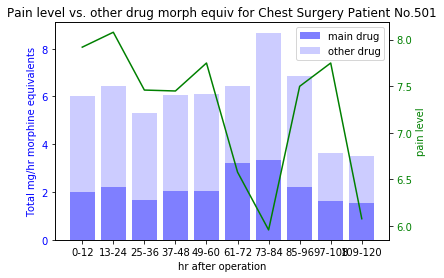

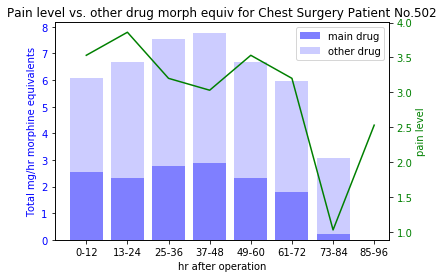

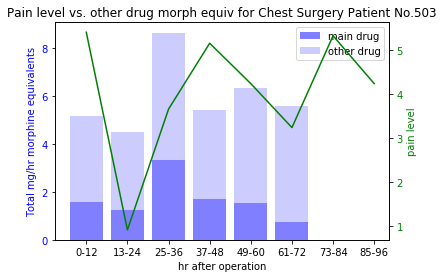

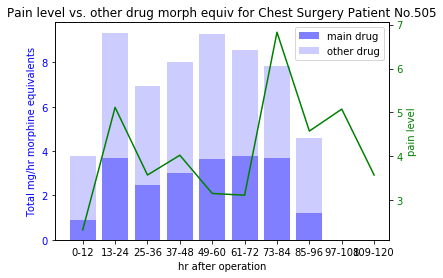

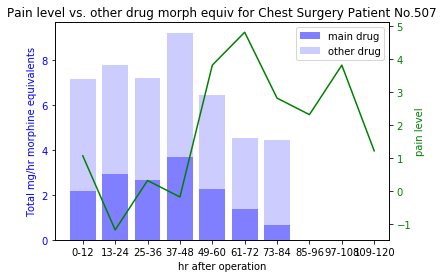

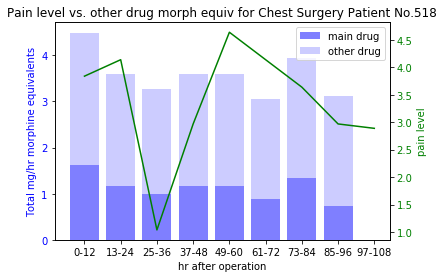

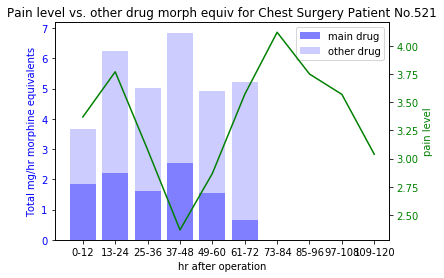

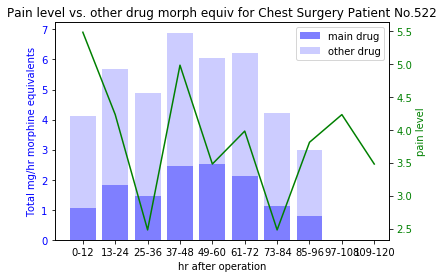

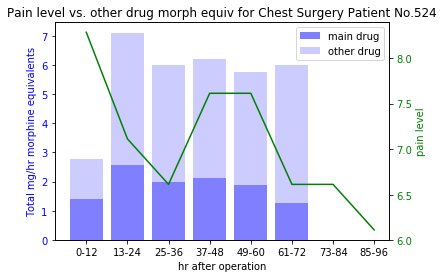

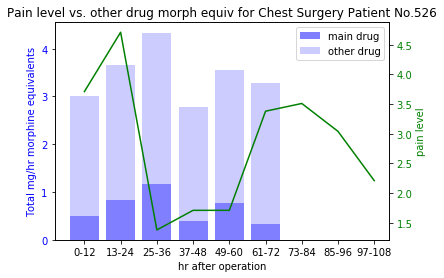

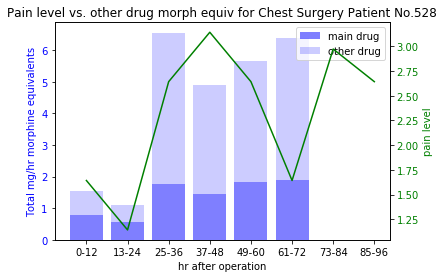

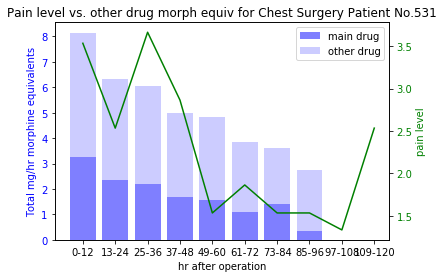

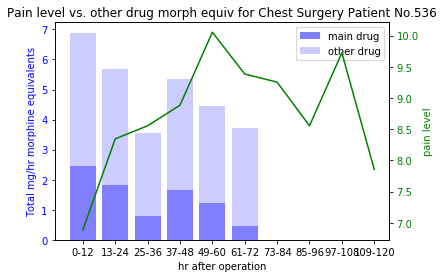

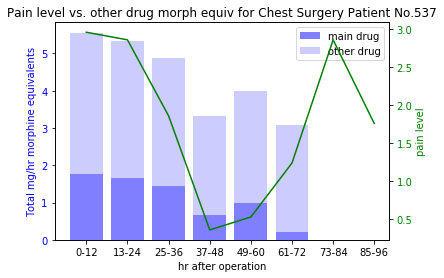

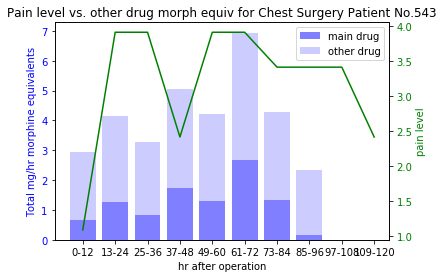

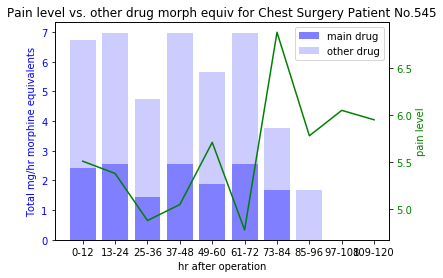

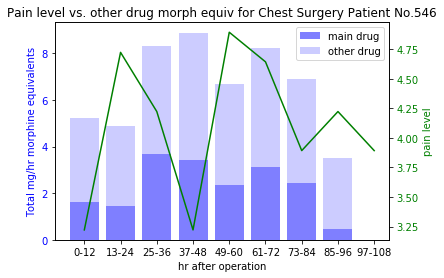

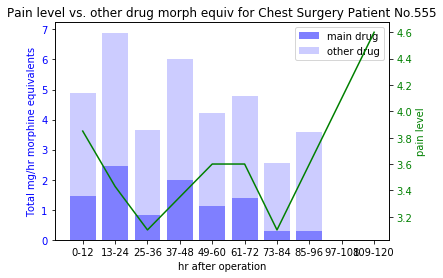

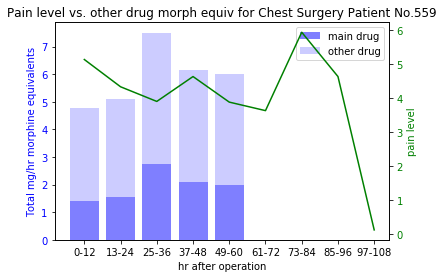

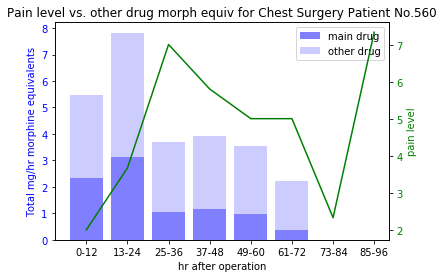

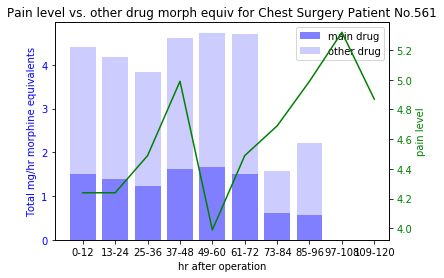

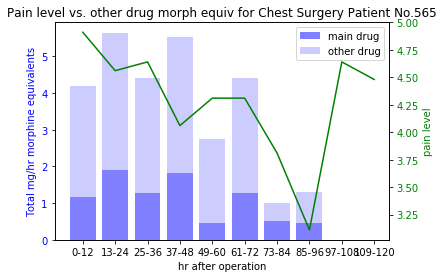

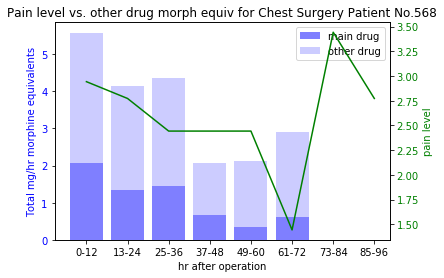

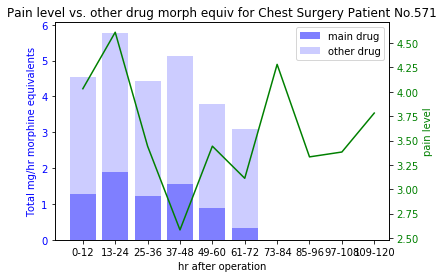

In [178]:
#plot for each individual patient who received chest surgery

for i in range(0,24):
    df = pd.DataFrame({
    "hr_after_operation": ["0-12","13-24","25-36","37-48","49-60","61-72","73-84","85-96","97-108","109-120"],
    "mean pain score": list(pain_level.iloc[i,:]),
    "main drug morph equiv":list(main_drug.iloc[i,:]),
    "other drug morph equiv": list(other_drug.iloc[i,:])})
    fig, ax1 = plt.subplots()
    ax1.bar(df["hr_after_operation"], df["main drug morph equiv"], align='center', alpha=0.5,color='b',label="main drug")
    ax1.bar(df["hr_after_operation"], df["other drug morph equiv"], bottom=df["main drug morph equiv"],\
            align='center',alpha=0.2,color='b',label="other drug")
    ax1.legend(loc="upper right")
    ax1.set_xlabel("hr after operation")
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel("Total mg/hr morphine equivalents", color='b')
    [tl.set_color('b') for tl in ax1.get_yticklabels()]
    plt.title('Pain level vs. other drug morph equiv for Chest Surgery Patient No.'+ str(other_drug.index[i]))
    #Set up ax2 to be the second y axis with x shared
    ax2 = ax1.twinx()
    #Plot a line
    ax2.plot(df["hr_after_operation"], df["mean pain score"], 'g-')
    # Make the y-axis label and tick labels match the line color.
    ax2.set_ylabel('pain level', color='g')
    [tl.set_color('g') for tl in ax2.get_yticklabels()]